In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc

import tensorrt as trt

import utils

## Settings

In [2]:
ENGINE_FPATH = 'data/engine.plan' # ADJUST
CLASSES = ['Cat', 'Dog'] # ADJUST
CROP_SIZE = (224, 224) # ADJUST

## Load TensorRT engine

In [3]:
engine = trt.lite.Engine(PLAN=ENGINE_FPATH)

## Load and prepare input image

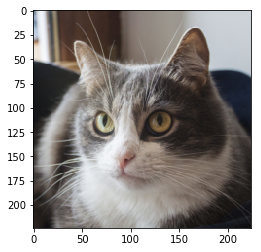

In [4]:
INPUT_IMAGE_FPATH = 'img/image.png'
# INPUT_IMAGE_FPATH = 'imagenet/val/ILSVRC2012_val_00004422.JPEG'
# INPUT_IMAGE_FPATH = 'imagenet/val/ILSVRC2012_val_00002708.JPEG'

def prepare_image(img_in, crop_size):
    img = img_in.astype(np.float32)
    img = utils.resize_and_crop(img, crop_size)    
    img = img.transpose(2, 0, 1) # to CHW
    return img

img = scipy.misc.imread(INPUT_IMAGE_FPATH, mode='RGB')
img = prepare_image(img, CROP_SIZE)
_=plt.imshow(img.transpose(1, 2, 0)/255.)

## Run inference

In [5]:
out = engine.infer(img)

print('Prediction: {}'.format(CLASSES[np.argmax(out[0])]))

Prediction: Cat


## Calculate validation accuracy

In [6]:
import data_provider
image_list, label_list = data_provider.prepare_sample_list(
        'imagenet/val/','imagenet/val.txt', classes=[281, 239])

correct = 0
for img_fpath, label in zip(image_list, label_list):
    img = scipy.misc.imread(img_fpath, mode='RGB')
    img = prepare_image(img, CROP_SIZE)
    out = engine.infer(img)
    if np.argmax(out[0]) == label:
        correct += 1
        
accuracy = float(correct) / len(image_list)
print('Accuracy: {}'.format(accuracy))

Accuracy: 0.97


## Measure execution time

In [7]:
%%timeit -n 10 -r 10

out = engine.infer(img)

4.71 ms ± 107 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)
